# Análisis de datos vacunales 2021: Argentina y Perú

Análisis de datos de la vacunación contra Covid-19 en algunos países de América Latina, presentado en PyCon Latam 2021 durante la charla "Análisis exploratorio de datos: tecnología social y gobiernos democráticos".


Fontes:
- Perú (https://www.datosabiertos.gob.pe/dataset/vacunacion)
- Argentina (https://www.datos.gob.ar/dataset/salud-vacunas-contra-covid-19-dosis-aplicadas-republica-argentina---registro-desagregado)


In [3]:
from matplotlib import pyplot as plt
from zipfile import ZipFile
 
import datetime
import py7zr
import requests
 
import numpy as np
import pandas as pd

# Preprocesamiento de datos

## Argentina

In [ ]:
url_argentina = "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/datos_nomivac_covid19.zip"
request_get = requests.get(url_argentina)
request_get

In [ ]:
with open('datos_nomivac_covid_19.zip', 'wb') as zip_argentina:
  zip_argentina.write(request_get.content)

In [ ]:
with ZipFile('datos_nomivac_covid_19.zip', 'r') as zip_argentina:
  title = zip_argentina.namelist()
  zip_argentina.extract(member=title[0])

In [28]:
vacunacion_argentina = pd.read_csv('/content/datos_nomivac_covid19.csv', parse_dates=['fecha_aplicacion'])
vacunacion_argentina

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,70-79,Buenos Aires,6,Quilmes,658,Buenos Aires,6,Quilmes,658,2021-05-12,Sinopharm,60 o más años,2,2021030371
1,M,60-69,Misiones,54,Libertador Grl. San Martín,77,Misiones,54,Libertador Grl. San Martín,77,2021-03-11,Sputnik,60 o más años,1,486010121
2,F,18-29,Buenos Aires,6,Florencio Varela,274,Buenos Aires,6,Florencio Varela,274,2021-06-01,Sputnik,18 a 59 años CON Factores de Riesgo,1,I-490421
3,F,50-59,Buenos Aires,6,Pilar,638,Buenos Aires,6,Pilar,638,2021-06-25,AstraZeneca,Estratégico,1,77534
4,F,50-59,Buenos Aires,6,General San Martín,371,Buenos Aires,6,General San Martín,371,2021-06-01,AstraZeneca,Salud,1,NF0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41408684,M,40-49,Buenos Aires,6,Florencio Varela,274,Buenos Aires,6,Florencio Varela,274,2021-05-20,Sputnik,18 a 59 años CON Factores de Riesgo,1,I-420321
41408685,M,40-49,Mendoza,50,Capital,7,Mendoza,50,Capital,7,2021-06-18,AstraZeneca,40 a 49 años SIN Factores de Riesgo,1,77534
41408686,F,60-69,Buenos Aires,6,San Fernando,749,Buenos Aires,6,San Fernando,749,2021-07-01,AstraZeneca,Salud,2,NH0303
41408687,M,60-69,Buenos Aires,6,Merlo,539,Buenos Aires,6,Merlo,539,2021-04-14,Sputnik,60 o más años,1,I-250321


In [29]:
vacunacion_argentina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41408689 entries, 0 to 41408688
Data columns (total 15 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   sexo                        object        
 1   grupo_etario                object        
 2   jurisdiccion_residencia     object        
 3   jurisdiccion_residencia_id  int64         
 4   depto_residencia            object        
 5   depto_residencia_id         int64         
 6   jurisdiccion_aplicacion     object        
 7   jurisdiccion_aplicacion_id  int64         
 8   depto_aplicacion            object        
 9   depto_aplicacion_id         int64         
 10  fecha_aplicacion            datetime64[ns]
 11  vacuna                      object        
 12  condicion_aplicacion        object        
 13  orden_dosis                 int64         
 14  lote_vacuna                 object        
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 4.6+ GB


## Perú

In [41]:
dict_peru = pd.read_excel('https://www.datosabiertos.gob.pe/sites/default/files/Diccionario_Datos%20%285%29.XLSX')
dict_peru

,Variable,Descripción
0,FECHA_CORTE,Fecha de corte de información
1,UUID,ID de la persona vacunada
2,GRUPO_RIESGO,Grupo de riesgo al que pertenece la persona va...
3,EDAD,Edad de la persona vacunada
4,SEXO,Sexo de la persona vacunada
5,FECHA_VACUNACION,Fecha de vacunación
6,DOSIS,Dosis aplicada
7,FABRICANTE,Fabricante de la vacuna
8,DIRESA,Diresa del EESS donde se aplicó la vacuna
9,DEPARTAMENTO,Departamento del EESS donde se aplicó la vacuna


In [ ]:
url_peru = "https://cloud.minsa.gob.pe/s/To2QtqoNjKqobfw/download"
request_get_peru = requests.get(url_peru)
request_get_peru

In [ ]:
with open('peru_vacunacion_covid_19.7z', 'wb') as zip_peru:
  zip_peru.write(request_get_peru.content)

In [ ]:
with py7zr.SevenZipFile('peru_vacunacion_covid_19.7z', mode='r') as zip_peru:
  zip_peru.extractall()

In [8]:
vacunacion_peru = pd.read_csv("/content/vacunas_covid.csv", encoding='utf-8-sig', parse_dates=['FECHA_CORTE', 'FECHA_VACUNACION'])
vacunacion_peru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17847210 entries, 0 to 17847209
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FECHA_CORTE       datetime64[ns]
 1   UUID              object        
 2   GRUPO_RIESGO      object        
 3   EDAD              int64         
 4   SEXO              object        
 5   FECHA_VACUNACION  datetime64[ns]
 6   DOSIS             int64         
 7   FABRICANTE        object        
 8   DIRESA            object        
 9   DEPARTAMENTO      object        
 10  PROVINCIA         object        
 11  DISTRITO          object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 1.6+ GB


# Explotación

Lo que buscamos:

- La distribuición etária de la población vacunada;
- Comparación entre los 2 países del porcentaje de la población vacunada;

## Argentina, Perú

Para facilitar nuestro análisis, crearemos un dataframe apenas con los datos que importa para lo que buscamos. Además, uniremos los dataframes para facilitar nuestro trabalho, por lo tanto tendremos que poner el mismo estandarde en los dataframes de ambos los países.

Estandarización del dataframe de Argentina

In [31]:
vacunacion_argentina.columns

Index(['sexo', 'grupo_etario', 'jurisdiccion_residencia',
       'jurisdiccion_residencia_id', 'depto_residencia', 'depto_residencia_id',
       'jurisdiccion_aplicacion', 'jurisdiccion_aplicacion_id',
       'depto_aplicacion', 'depto_aplicacion_id', 'fecha_aplicacion', 'vacuna',
       'condicion_aplicacion', 'orden_dosis', 'lote_vacuna'],
      dtype='object')

In [33]:
vacunacion_argentina_estandar = vacunacion_argentina[['grupo_etario', 'fecha_aplicacion', 'vacuna', 'orden_dosis']].copy()
vacunacion_argentina_estandar['pais'] = 'Argentina'
vacunacion_argentina_estandar['fecha_aplicacion'] = vacunacion_argentina_estandar['fecha_aplicacion'].dt.strftime('%m-%Y')

In [ ]:
vacunacion_argentina_estandar.to_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/vacunacion_argentina_estandar.csv')


In [35]:
vacunacion_argentina_estandar.head()

,grupo_etario,fecha_aplicacion,vacuna,orden_dosis,pais
0,70-79,05-2021,Sinopharm,2,Argentina
1,60-69,03-2021,Sputnik,1,Argentina
2,18-29,06-2021,Sputnik,1,Argentina
3,50-59,06-2021,AstraZeneca,1,Argentina
4,50-59,06-2021,AstraZeneca,1,Argentina


Para aplicar los mismos grupos etários en los datos de Perú, sacaremos un listado de estos primeros datos que estamos manejando.

In [37]:
grupo_etario = vacunacion_argentina_estandar['grupo_etario'].unique().tolist()
grupo_etario.sort()
grupo_etario

['18-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99',
 '>=100',
 'S.I.']

In [38]:
grupo_etario.pop(-1)
grupo_etario

['18-29',
 '30-39',
 '40-49',
 '50-59',
 '60-69',
 '70-79',
 '80-89',
 '90-99',
 '>=100']

Estandarización del dataframe de Perú

In [39]:
vacunacion_peru.columns

Index(['FECHA_CORTE', 'UUID', 'GRUPO_RIESGO', 'EDAD', 'SEXO',
       'FECHA_VACUNACION', 'DOSIS', 'FABRICANTE', 'DIRESA', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO'],
      dtype='object')

In [41]:
vacunacion_peru_estandar = vacunacion_peru[['EDAD', 'FECHA_VACUNACION', 'FABRICANTE', 'DOSIS']].copy()
vacunacion_peru_estandar['pais'] = 'Perú'
vacunacion_peru_estandar['FECHA_VACUNACION'] = vacunacion_peru_estandar['FECHA_VACUNACION'].dt.strftime('%m-%Y')

In [ ]:
vacunacion_peru_estandar.to_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/vacunacion_peru_estandar.csv')

In [42]:
cortes = [18, 30, 40, 50, 60, 70, 80, 90, 100, 300]
vacunacion_peru_estandar['EDAD'] = pd.cut(vacunacion_peru_estandar['EDAD'], cortes, include_lowest=True, labels=grupo_etario)

In [43]:
vacunacion_peru_estandar.head()

,EDAD,FECHA_VACUNACION,FABRICANTE,DOSIS,pais
0,50-59,07-2021,PFIZER,1,Perú
1,30-39,08-2021,PFIZER,2,Perú
2,50-59,04-2021,PFIZER,1,Perú
3,60-69,06-2021,PFIZER,2,Perú
4,30-39,07-2021,PFIZER,1,Perú


Para concatenar los dataframes, hace falta que los títulos de las columnas sean los mismos. Así que, vamos usar los mismos títulos del dataframe de Argentina

In [44]:
vacunacion_peru_estandar.columns = ['grupo_etario', 'fecha_aplicacion', 'vacuna', 'orden_dosis', 'pais']

In [ ]:
vacunacion_ar_pe = pd.concat([vacunacion_argentina_estandar, vacunacion_peru_estandar], ignore_index=True)

Las próximas 3 celdas no hace falta que lo hagas. Están aquí para que veas cómo leer los datos ya declarando los tipos de cada columna.

In [ ]:
vacunacion_ar_pe.to_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/vacunacion_ar_pe_estandar.csv')

In [1]:
dtype = {'grupo_etario': str,
         'fecha_aplicacion': str,
         'vacuna': str,
         'orden_dosis': int,
         'pais': str}

In [4]:
vacunacion_ar_pe = pd.read_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/vacunacion_ar_pe_estandar.csv', dtype=dtype, parse_dates=['fecha_aplicacion']) #linea duplicada

In [5]:
vacunacion_ar_pe.shape

(59255899, 6)

In [6]:
vacunacion_ar_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59255899 entries, 0 to 59255898
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Unnamed: 0        int64         
 1   grupo_etario      object        
 2   fecha_aplicacion  datetime64[ns]
 3   vacuna            object        
 4   orden_dosis       int64         
 5   pais              object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.6+ GB


## Edad

- Hay distociones en la edad?

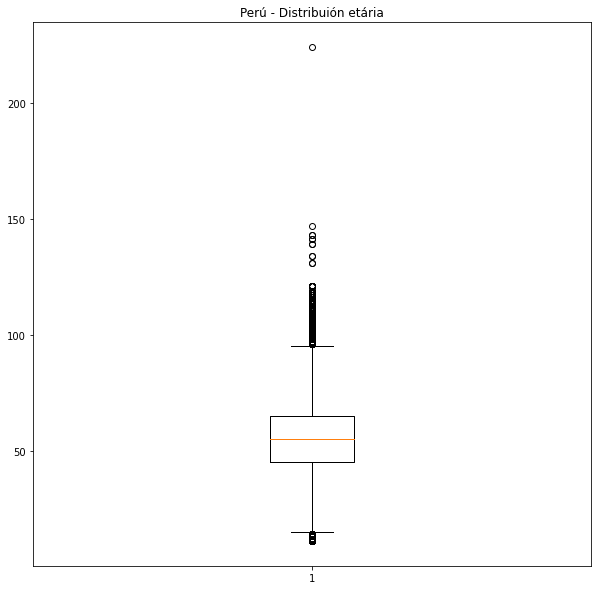

In [9]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
ax1.set_title('Perú - Distribuión etária')
ax1.boxplot(vacunacion_peru['EDAD'].to_list())
plt.show()

- Cuál es la cantidade de vacunas aplicadas en cada grupo etário?

In [10]:
vacunacion_ar_pe['grupo_etario'].unique()

array(['70-79', '60-69', '18-29', '50-59', '40-49', '30-39', '80-89',
       '90-99', 'S.I.', '>=100', nan], dtype=object)

In [11]:
vacunacion_ar_pe['grupo_etario'] = vacunacion_ar_pe.loc[:, 'grupo_etario'].replace({'S.I.': np.nan})

In [12]:
vacunacion_ar_pe.columns

Index(['Unnamed: 0', 'grupo_etario', 'fecha_aplicacion', 'vacuna',
       'orden_dosis', 'pais'],
      dtype='object')

In [13]:
vacunacion_ar_pe[['pais','grupo_etario', 'vacuna']].groupby(by=['pais', 'grupo_etario']).count()

vacuna
pais      grupo_etario         
Argentina 18-29         7479318
          30-39         7441287
          40-49         7429493
          50-59         6522775
          60-69         5962692
          70-79         4173814
          80-89         1729950
          90-99          301881
          >=100            5543
Perú      18-29          922103
          30-39         1675405
          40-49         4362106
          50-59         4553676
          60-69         3404580
          70-79         1968143
          80-89          818049
          90-99          129626
          >=100            3719

In [ ]:
vacunacion_ar_pe[['pais','grupo_etario', 'vacuna']].groupby(by=['pais', 'grupo_etario'], as_index=False).count().to_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/grupo_etario_ar_pe.csv')

- Comparación del percentual de la población vacunada entre los 2 países;

In [31]:
poblacion_argentina = 44940000	# fuente: https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2
poblacion_peru = 32510000 # fuente: https://www.inei.gob.pe/estadisticas/indice-tematico/poblacion-y-vivienda/

poblacion = [poblacion_argentina, poblacion_peru]

In [22]:
paises = primera_dosis_ar_pe['pais'].unique().tolist()
paises

['Argentina', 'Perú']

In [29]:
vacunacion_ar_pe[vacunacion_ar_pe['pais'] == 'Argentina']['orden_dosis'].value_counts()

1    27703975
2    13704714
Name: orden_dosis, dtype: int64

In [27]:
dosis_argentina = vacunacion_ar_pe[vacunacion_ar_pe['pais'] == 'Argentina']['orden_dosis'].value_counts().to_list()
dosis_argentina

[27703975, 13704714]

In [28]:
vacunacion_ar_pe[vacunacion_ar_pe['pais'] == 'Perú']['orden_dosis'].value_counts()

1    10046728
2     7800482
Name: orden_dosis, dtype: int64

In [30]:
dosis_peru = vacunacion_ar_pe[vacunacion_ar_pe['pais'] == 'Perú']['orden_dosis'].value_counts().to_list()
dosis_peru

[10046728, 7800482]

In [36]:
datos = {'pais': paises, 'poblacion': poblacion, 'primera_dosis': [dosis_argentina[0], dosis_peru[0]], 'segunda_dosis': [dosis_argentina[1], dosis_peru[1]]}
panorama_vacunacion_ar_pe = pd.DataFrame(data=datos)

In [37]:
panorama_vacunacion_ar_pe

,pais,poblacion,primera_dosis,segunda_dosis
0,Argentina,44940000,27703975,13704714
1,Perú,32510000,10046728,7800482


In [38]:
panorama_vacunacion_ar_pe['primera_dosis_porcentaje'] = round((panorama_vacunacion_ar_pe['primera_dosis']*100/panorama_vacunacion_ar_pe['poblacion']), 2)
panorama_vacunacion_ar_pe['segunda_dosis_porcentaje'] = round((panorama_vacunacion_ar_pe['segunda_dosis']*100/panorama_vacunacion_ar_pe['poblacion']), 2)
panorama_vacunacion_ar_pe

,pais,poblacion,primera_dosis,segunda_dosis,primera_dosis_porcentaje,segunda_dosis_porcentaje
0,Argentina,44940000,27703975,13704714,61.65,30.50
1,Perú,32510000,10046728,7800482,30.90,23.99


In [40]:
panorama_vacunacion_ar_pe.to_csv('/content/drive/MyDrive/Comunidades/Palestras/datos/panorama_vacunacion_ar_pe.csv')

Si a ti te gusta, así como a mí, las gráficas hermosas. Sugiero usar la plataforma [Flourish Studio](https://app.flourish.studio). Mira que hermosa ha quedada la representación de la tabla de comparación entre Argentina y Perú acerca del percentaje de la población vacunada con la 1 y 2 dosis.

![imagene](grafica-comparacion-vacunacion-covid19-argentina-peru.png)